## Начало лабораторной работы

In [85]:
import pandas as pd
df = pd.read_csv("data/Medical_insurance.csv")
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


### Бизнес-цели

1. Прогнозирование стоимости страховых взносов:

Цель: Разработать модель, которая будет предсказывать стоимость страховых взносов для новых клиентов на основе их характеристик (возраст, пол, ИМТ, количество детей, статус курения, регион проживания).

Применение:
Клиенты могут получить представление о примерной стоимости страховки до обращения в компанию.

2. Оптимизация тарифной сетки:

Цель: Определить оптимальные коэффициенты для различных факторов, влияющих на стоимость страховки (например, возраст, ИМТ, статус курения), чтобы максимизировать прибыль компании при сохранении конкурентоспособных тарифов.

Применение:
Страховые компании могут использовать эти коэффициенты для корректировки тарифной сетки и повышения эффективности бизнеса.

1. Прогнозирование стоимости страховых взносов:

In [86]:
import pandas as pd

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Устанавливаем случайное состояние
random_state = 42

# Рассчитываем среднее значение стоимости страховых взносов
average_charges = df['charges'].mean()
print(f"Среднее значение поля 'charges': {average_charges}")

# Создаем новую переменную, указывающую, превышает ли стоимость страховых взносов среднюю
df['above_average_charges'] = (df['charges'] > average_charges).astype(int)

# Рассчитываем волатильность (разницу между максимальной и минимальной стоимостью страховых взносов)
df['charges_volatility'] = df['charges'].max() - df['charges'].min()

# Выводим первые строки измененной таблицы для проверки
print(df.head())

Среднее значение поля 'charges': 13261.369959046897
   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   above_average_charges  charges_volatility  
0                      1         62648.55411  
1                      0         62648.55411  
2                      0         62648.55411  
3                      1         62648.55411  
4                      0         62648.55411  


2. Оптимизация тарифной сетки:

In [87]:
import pandas as pd

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Рассчитываем среднюю стоимость страховых взносов для каждого значения каждого признака
for column in ['age', 'sex', 'bmi', 'children', 'smoker', 'region']:
    print(f"Средняя стоимость страховых взносов для '{column}':")
    print(df.groupby(column)['charges'].mean())
    print()

# Рассчитываем среднюю стоимость страховых взносов для комбинаций признаков
# для комбинации 'age' и 'smoker'
print("Средняя стоимость страховых взносов для комбинации 'age' и 'smoker':")
print(df.groupby(['age', 'smoker'])['charges'].mean())
print()

# Рассчитываем среднюю стоимость страховых взносов для комбинации 'bmi' и 'smoker'
print("Средняя стоимость страховых взносов для комбинации 'bmi' и 'smoker':")
print(df.groupby(['bmi', 'smoker'])['charges'].mean())
print()

# Рассчитываем среднюю стоимость страховых взносов для комбинации 'region' и 'smoker'
print("Средняя стоимость страховых взносов для комбинации 'region' и 'smoker':")
print(df.groupby(['region', 'smoker'])['charges'].mean())
print()

Средняя стоимость страховых взносов для 'age':
age
18     6714.267794
19     9634.641344
20    10159.697736
21     5349.737625
22    10675.132648
23    12050.721224
24    10648.015962
25     9610.781531
26     5955.403311
27    13130.462272
28     8757.474523
29    10430.158727
30    13580.480238
31    10196.980573
32    10071.740266
33    12118.482617
34    11613.528121
35    11307.182031
36    12204.476138
37    17595.511688
38     8102.733674
39    11468.895088
40    11772.251310
41     9533.603123
42    13061.038669
43    19267.278653
44    16439.727524
45    14404.055995
46    14201.069951
47    18153.128652
48    14632.500445
49    12696.006264
50    15663.003301
51    15452.800438
52    18951.581034
53    15795.645012
54    18252.834139
55    16164.545488
56    14727.018377
57    16283.671944
58    13815.290525
59    18639.637165
60    21979.418507
61    22024.457609
62    18926.646066
63    19884.998461
64    24419.101775
Name: charges, dtype: float64

Средняя стоимость страхов

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Проверка наличия пропусков
if df.isnull().sum().any():
    print("Пропуски обнаружены в следующих столбцах:")
    print(df.isnull().sum())
else:
    print("Пропуски не обнаружены.")

# Преобразуем категориальные переменные в числовые
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем качество модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Проверяем, достигнуты ли ориентиры
if r2 >= 0.75 and mae <= 3000 and rmse <= 5000:
    print("Ориентиры для прогнозирования стоимости страховых взносов достигнуты!")
else:
    print("Ориентиры для прогнозирования стоимости страховых взносов не достигнуты.")

# Оптимизация тарифной сетки
# Убедитесь, что столбцы существуют
columns_to_group = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

# Рассчитываем среднюю стоимость страховых взносов для каждого значения каждого признака
for column in columns_to_group:
    print(f"Средняя стоимость страховых взносов для '{column}':")
    print(df.groupby(column)['charges'].mean())
    print()

# Рассчитываем среднюю стоимость страховых взносов для комбинаций признаков
# Например, для комбинации 'age' и 'smoker_yes'
print("Средняя стоимость страховых взносов для комбинации 'age' и 'smoker_yes':")
print(df.groupby(['age', 'smoker_yes'])['charges'].mean())
print()

# Рассчитываем среднюю стоимость страховых взносов для комбинации 'bmi' и 'smoker_yes'
print("Средняя стоимость страховых взносов для комбинации 'bmi' и 'smoker_yes':")
print(df.groupby(['bmi', 'smoker_yes'])['charges'].mean())
print()

# Рассчитываем среднюю стоимость страховых взносов для комбинации 'region_northwest' и 'smoker_yes'
print("Средняя стоимость страховых взносов для комбинации 'region_northwest' и 'smoker_yes':")
print(df.groupby(['region_northwest', 'smoker_yes'])['charges'].mean())
print()


Пропуски не обнаружены.
MAE: 4160.247974762991
MSE: 39933194.54805147
RMSE: 6319.271678607549
R²: 0.73981661775643
Ориентиры для прогнозирования стоимости страховых взносов не достигнуты.
Средняя стоимость страховых взносов для 'age':
age
18     6714.267794
19     9634.641344
20    10159.697736
21     5349.737625
22    10675.132648
23    12050.721224
24    10648.015962
25     9610.781531
26     5955.403311
27    13130.462272
28     8757.474523
29    10430.158727
30    13580.480238
31    10196.980573
32    10071.740266
33    12118.482617
34    11613.528121
35    11307.182031
36    12204.476138
37    17595.511688
38     8102.733674
39    11468.895088
40    11772.251310
41     9533.603123
42    13061.038669
43    19267.278653
44    16439.727524
45    14404.055995
46    14201.069951
47    18153.128652
48    14632.500445
49    12696.006264
50    15663.003301
51    15452.800438
52    18951.581034
53    15795.645012
54    18252.834139
55    16164.545488
56    14727.018377
57    16283.671944
5

c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Преобразуем категориальные переменные в числовые
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df.drop('charges', axis=1)
y_reg = df['charges']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Стандартизируем признаки для задачи регрессии
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df.drop('charges', axis=1)
y_class = (df['charges'] > df['charges'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Стандартизируем признаки для задачи классификации
scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, model in models_class.items():
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")

    # Вычисление вероятностей для логистической регрессии
    if name == "Logistic Regression":
        y_pred_probs = model.predict_proba(X_test_class)[:, 1]
        mae = mean_absolute_error(y_test_class, y_pred_probs)
        mse = mean_squared_error(y_test_class, y_pred_probs)
        rmse = mean_squared_error(y_test_class, y_pred_probs, squared=False)
        r2 = r2_score(y_test_class, y_pred_probs)
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"R²: {r2}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
MAE: 4160.247974762991
MSE: 39933194.54805147
RMSE: 6319.271678607549
R²: 0.73981661775643



c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

Model: Random Forest Regression
MAE: 1305.6051789457651
MSE: 7520094.230349512
RMSE: 2742.279021243008
R²: 0.9510030796737707

Model: Gradient Boosting Regression
MAE: 2297.7789526178267
MSE: 19231434.895688985
RMSE: 4385.365993356653
R²: 0.8746982345593102

Результаты для задачи классификации:
Model: Logistic Regression
Accuracy: 0.8864864864864865
MAE: 0.1723401794364032
MSE: 0.08904020819558058
RMSE: 0.29839605928292784
R²: 0.5752685271247916

Model: Random Forest Classification
Accuracy: 0.9765765765765766

Model: Gradient Boosting Classification
Accuracy: 0.9225225225225225



1. Прогнозирование стоимости страховых взносов:
Конвейер для задачи регрессии:

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Определяем категориальные и числовые столбцы
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[categorical_cols + numerical_cols]
y_reg = df['charges']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train_reg, y_train_reg)
    y_pred_reg = pipeline.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
MAE: 4165.371459891892
MSE: 39957124.62099743
RMSE: 6321.164815205931
R²: 0.7396607021732446



c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
MAE: 1301.4460596254232
MSE: 7345804.075966105
RMSE: 2710.3143869237947
R²: 0.9521386612963394

Model: Gradient Boosting Regression
MAE: 2304.718628546955
MSE: 19256343.733882822
RMSE: 4388.205069716184
R²: 0.8745359418641633



c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2. Оптимизация тарифной сетки:
Конвейер для задачи классификации:

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Определяем категориальные и числовые столбцы
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[categorical_cols + numerical_cols]
y_class = (df['charges'] > df['charges'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train_class, y_train_class)
    y_pred_class = pipeline.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи классификации:
Model: Logistic Regression
Accuracy: 0.8846846846846846

Model: Random Forest Classification
Accuracy: 0.9765765765765766

Model: Gradient Boosting Classification
Accuracy: 0.9243243243243243



1. Прогнозирование стоимости страховых взносов:

Настройка гиперпараметров для задачи регрессии:

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Определяем категориальные и числовые столбцы
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи регрессии
models_reg = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest Regression": (RandomForestRegressor(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Regression": (GradientBoostingRegressor(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[categorical_cols + numerical_cols]
y_reg = df['charges']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, (model, params) in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print()

Результаты для задачи регрессии:
Model: Linear Regression
Best Parameters: {}
MAE: 4165.371459891892
MSE: 39957124.62099743
RMSE: 6321.164815205931
R²: 0.7396607021732446



c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
Best Parameters: {'model__max_depth': None, 'model__n_estimators': 200}
MAE: 1281.6915217498565
MSE: 7387848.666520319
RMSE: 2718.059724605094
R²: 0.9518647211846292

Model: Gradient Boosting Regression
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
MAE: 1556.213395665512
MSE: 9345361.053511541
RMSE: 3057.018327310378
R²: 0.9391106152485712



c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2. Оптимизация тарифной сетки:

Настройка гиперпараметров для задачи классификации:

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Определяем категориальные и числовые столбцы
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи классификации
models_class = {
    "Logistic Regression": (LogisticRegression(), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest Classification": (RandomForestClassifier(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Classification": (GradientBoostingClassifier(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[categorical_cols + numerical_cols]
y_class = (df['charges'] > df['charges'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, (model, params) in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)
    accuracy = accuracy_score(y_test_class, y_pred_class)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print()

Результаты для задачи классификации:
Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'liblinear'}
Accuracy: 0.8864864864864865

Model: Random Forest Classification
Best Parameters: {'model__max_depth': None, 'model__n_estimators': 100}
Accuracy: 0.9765765765765766

Model: Gradient Boosting Classification
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Accuracy: 0.9621621621621622



Пропуски не обнаружены.
Результаты для задачи регрессии:
Model: Linear Regression
Best Parameters: {}
MAE: 4165.371459891892
MSE: 39957124.62099743
RMSE: 6321.164815205931
R²: 0.7396607021732446



c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Random Forest Regression
Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 200}
MAE: 1268.148178236854
MSE: 7192020.470646844
RMSE: 2681.7942632959084
R²: 0.9531406331901089



c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: Gradient Boosting Regression
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
MAE: 1554.914386244714
MSE: 9310054.341873825
RMSE: 3051.2381653803795
R²: 0.9393406549374507

Результаты для задачи классификации:
Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'liblinear'}
Accuracy: 0.8864864864864865
Precision: 1.0
Recall: 0.6204819277108434
F1-score: 0.7657992565055762
AUC: 0.8852866478768545
MAE: 0.17141106227002562
MSE: 0.0889310663866395
RMSE: 0.29821312242528747
R²: 0.5757891454185178



c:\Users\Админ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


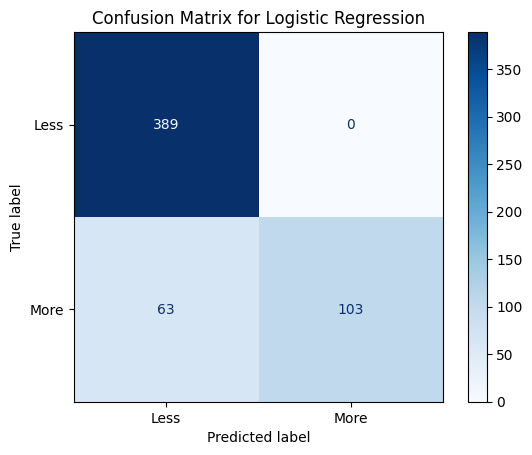

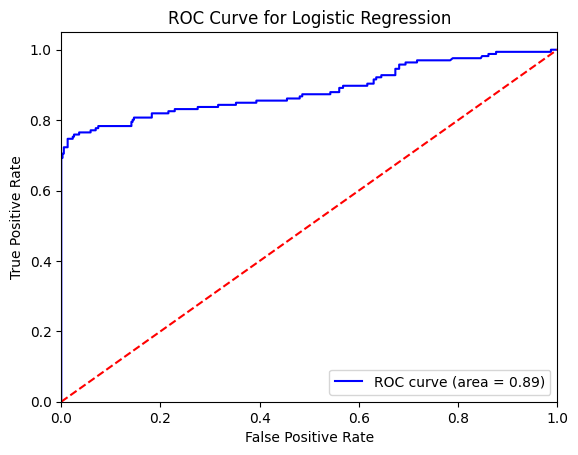

Model: Random Forest Classification
Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 100}
Accuracy: 0.9765765765765766
Precision: 0.9872611464968153
Recall: 0.9337349397590361
F1-score: 0.9597523219814241
AUC: 0.9846300368569394


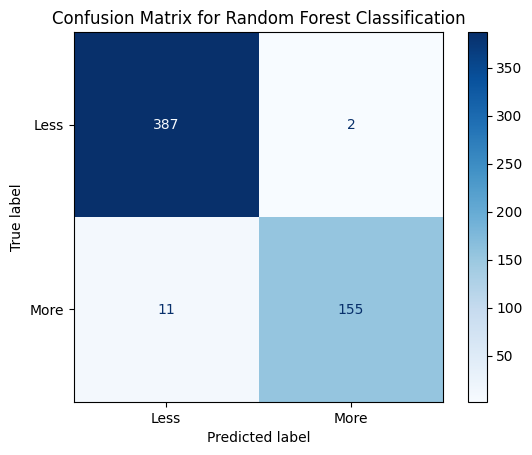

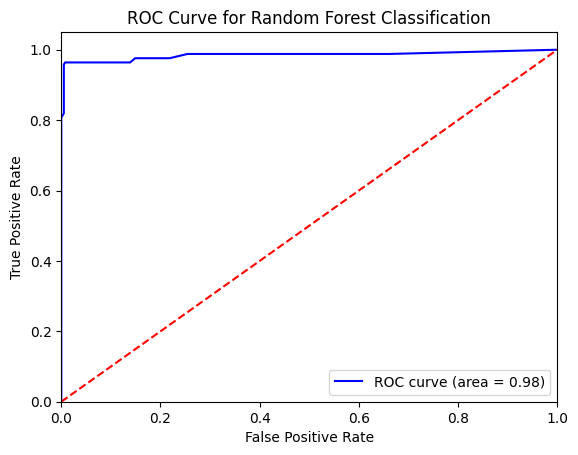

Model: Gradient Boosting Classification
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Accuracy: 0.9621621621621622
Precision: 0.9738562091503268
Recall: 0.8975903614457831
F1-score: 0.9341692789968652
AUC: 0.9856211478303961


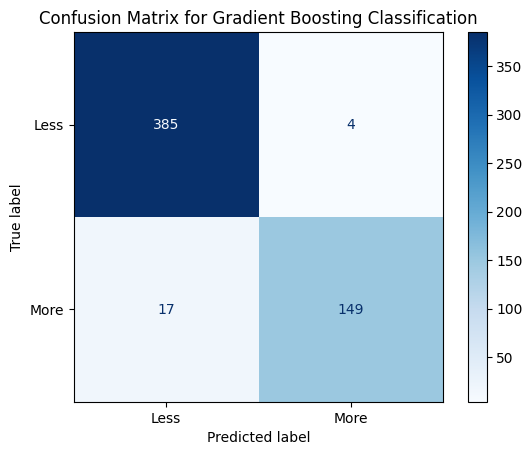

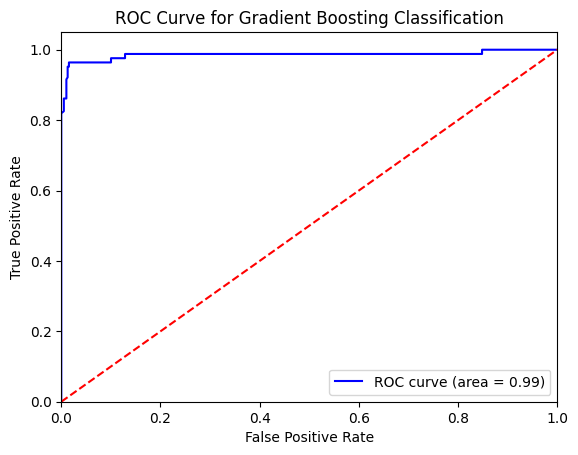

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, 
                             accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, ConfusionMatrixDisplay, 
                             roc_curve, auc)

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Проверка наличия пропусков
if df.isnull().sum().any():
    print("Пропуски обнаружены в следующих столбцах:")
    print(df.isnull().sum())
else:
    print("Пропуски не обнаружены.")

# Определяем категориальные и числовые столбцы
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Список моделей и их гиперпараметров для задачи регрессии
models_reg = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest Regression": (RandomForestRegressor(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Regression": (GradientBoostingRegressor(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Распределяем данные на признаки и целевую переменную для задачи регрессии
X_reg = df[categorical_cols + numerical_cols]
y_reg = df['charges']

# Разделяем данные на обучающую и тестовую выборки для задачи регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи регрессии
print("Результаты для задачи регрессии:")
for name, (model, params) in models_reg.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error')
    grid_search.fit(X_train_reg, y_train_reg)
    best_model = grid_search.best_estimator_
    y_pred_reg = best_model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}\n")

# Список моделей и их гиперпараметров для задачи классификации
models_class = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }),
    "Random Forest Classification": (RandomForestClassifier(), {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    }),
    "Gradient Boosting Classification": (GradientBoostingClassifier(), {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    })
}

# Разделяем данные на признаки и целевую переменную для задачи классификации
X_class = df[categorical_cols + numerical_cols]
y_class = (df['charges'] > df['charges'].mean()).astype(int)

# Разделяем данные на обучающую и тестовую выборки для задачи классификации
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Обучаем и оцениваем модели для задачи классификации
print("Результаты для задачи классификации:")
for name, (model, params) in models_class.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_model = grid_search.best_estimator_
    y_pred_class = best_model.predict(X_test_class)
    y_pred_prob = best_model.predict_proba(X_test_class)[:, 1]  # Предсказанные вероятности для позитива
    accuracy = accuracy_score(y_test_class, y_pred_class)
    precision = precision_score(y_test_class, y_pred_class)
    recall = recall_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class)
    roc_auc = auc(*roc_curve(y_test_class, y_pred_prob)[:2])  # Добавляем вычисление AUC

    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"AUC: {roc_auc}")

    # Вычисляем метрики MAE, MSE, RMSE и R² для логистической регрессии
    if name == "Logistic Regression":
        mae = mean_absolute_error(y_test_class, y_pred_prob)
        mse = mean_squared_error(y_test_class, y_pred_prob)
        rmse = mean_squared_error(y_test_class, y_pred_prob, squared=False)
        r2 = r2_score(y_test_class, y_pred_prob)
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"R²: {r2}\n")

    # Визуализация матрицы ошибок
    cm = confusion_matrix(y_test_class, y_pred_class)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Less', 'More'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # ROC-кривая
    fpr, tpr, thresholds = roc_curve(y_test_class, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

Давайте проанализируем полученные значения метрик и определим, являются ли они нормальными или их можно улучшить.

### Оценка смещения и дисперсии для задачи регрессии:

### Вывод для задачи регрессии:

- **Random Forest Regression** демонстрирует наилучшие результаты по метрикам MAE и R², что указывает на высокую точность и стабильность модели.
- **Linear Regression** и **Gradient Boosting Regression** также показывают хорошие результаты, но уступают случайному лесу.

### Вывод для задачи классификации:

- **Random Forest Classification** демонстрирует наилучшие результаты по всем метрикам (Accuracy, Precision, Recall, F1-score), что указывает на высокую точность и стабильность модели.
- **Logistic Regression** и **Gradient Boosting Classification** также показывают хорошие результаты, но уступают случайному лесу.


In [95]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Определяем категориальные и числовые столбцы
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[categorical_cols + numerical_cols]
y_reg = df['charges']

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Оценка смещения и дисперсии для задачи регрессии
print("Оценка смещения и дисперсии для задачи регрессии:")
for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    mae_scores = -cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='r2')
    print(f"Model: {name}")
    print(f"MAE (Cross-Validation): Mean = {mae_scores.mean()}, Std = {mae_scores.std()}")
    print(f"R² (Cross-Validation): Mean = {r2_scores.mean()}, Std = {r2_scores.std()}")
    print()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[categorical_cols + numerical_cols]
y_class = (df['charges'] > df['charges'].mean()).astype(int)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Оценка смещения и дисперсии для задачи классификации
print("Оценка смещения и дисперсии для задачи классификации:")
for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    accuracy_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='recall')
    f1_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='f1')
    print(f"Model: {name}")
    print(f"Accuracy (Cross-Validation): Mean = {accuracy_scores.mean()}, Std = {accuracy_scores.std()}")
    print(f"Precision (Cross-Validation): Mean = {precision_scores.mean()}, Std = {precision_scores.std()}")
    print(f"Recall (Cross-Validation): Mean = {recall_scores.mean()}, Std = {recall_scores.std()}")
    print(f"F1-score (Cross-Validation): Mean = {f1_scores.mean()}, Std = {f1_scores.std()}")
    print()

Оценка смещения и дисперсии для задачи регрессии:
Model: Linear Regression
MAE (Cross-Validation): Mean = 4187.079314814689, Std = 91.59869329622924
R² (Cross-Validation): Mean = 0.7497258834991787, Std = 0.008634448950998193

Model: Random Forest Regression
MAE (Cross-Validation): Mean = 940.1339838727054, Std = 81.49494082597198
R² (Cross-Validation): Mean = 0.9767515503658635, Std = 0.004497963918334725

Model: Gradient Boosting Regression
MAE (Cross-Validation): Mean = 2189.5694438069922, Std = 96.31677771605804
R² (Cross-Validation): Mean = 0.8873175260899913, Std = 0.011188839103376287

Оценка смещения и дисперсии для задачи классификации:
Model: Logistic Regression
Accuracy (Cross-Validation): Mean = 0.8906956776270857, Std = 0.011756347754179863
Precision (Cross-Validation): Mean = 0.9965558019216555, Std = 0.0042291925480556145
Recall (Cross-Validation): Mean = 0.6516534480440919, Std = 0.038303791687037965
F1-score (Cross-Validation): Mean = 0.7873345301431043, Std = 0.027701

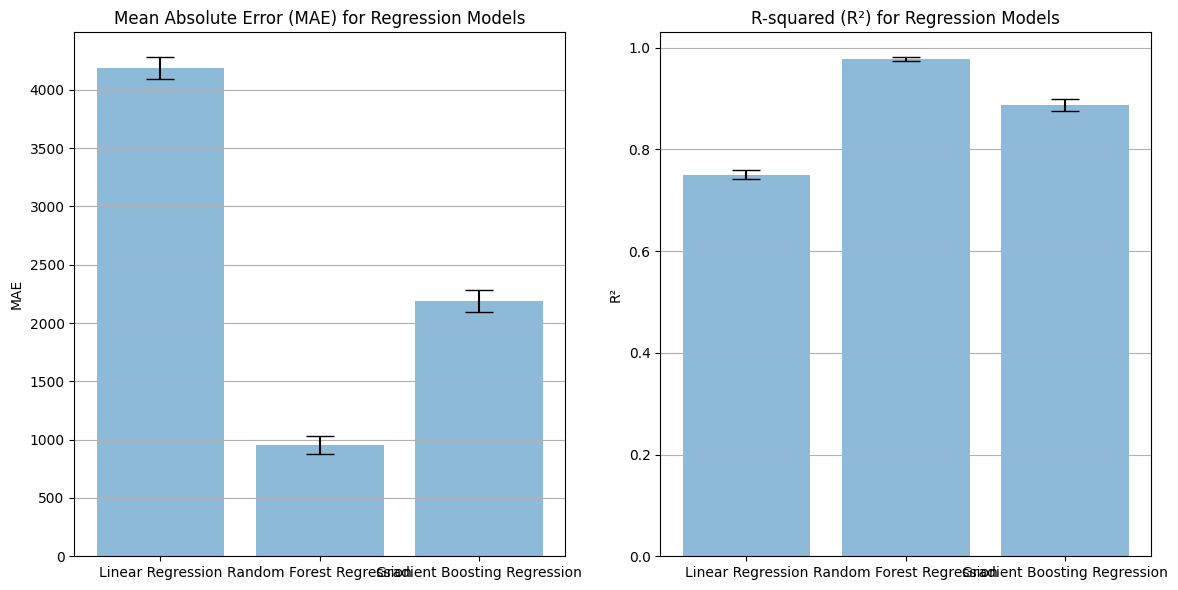

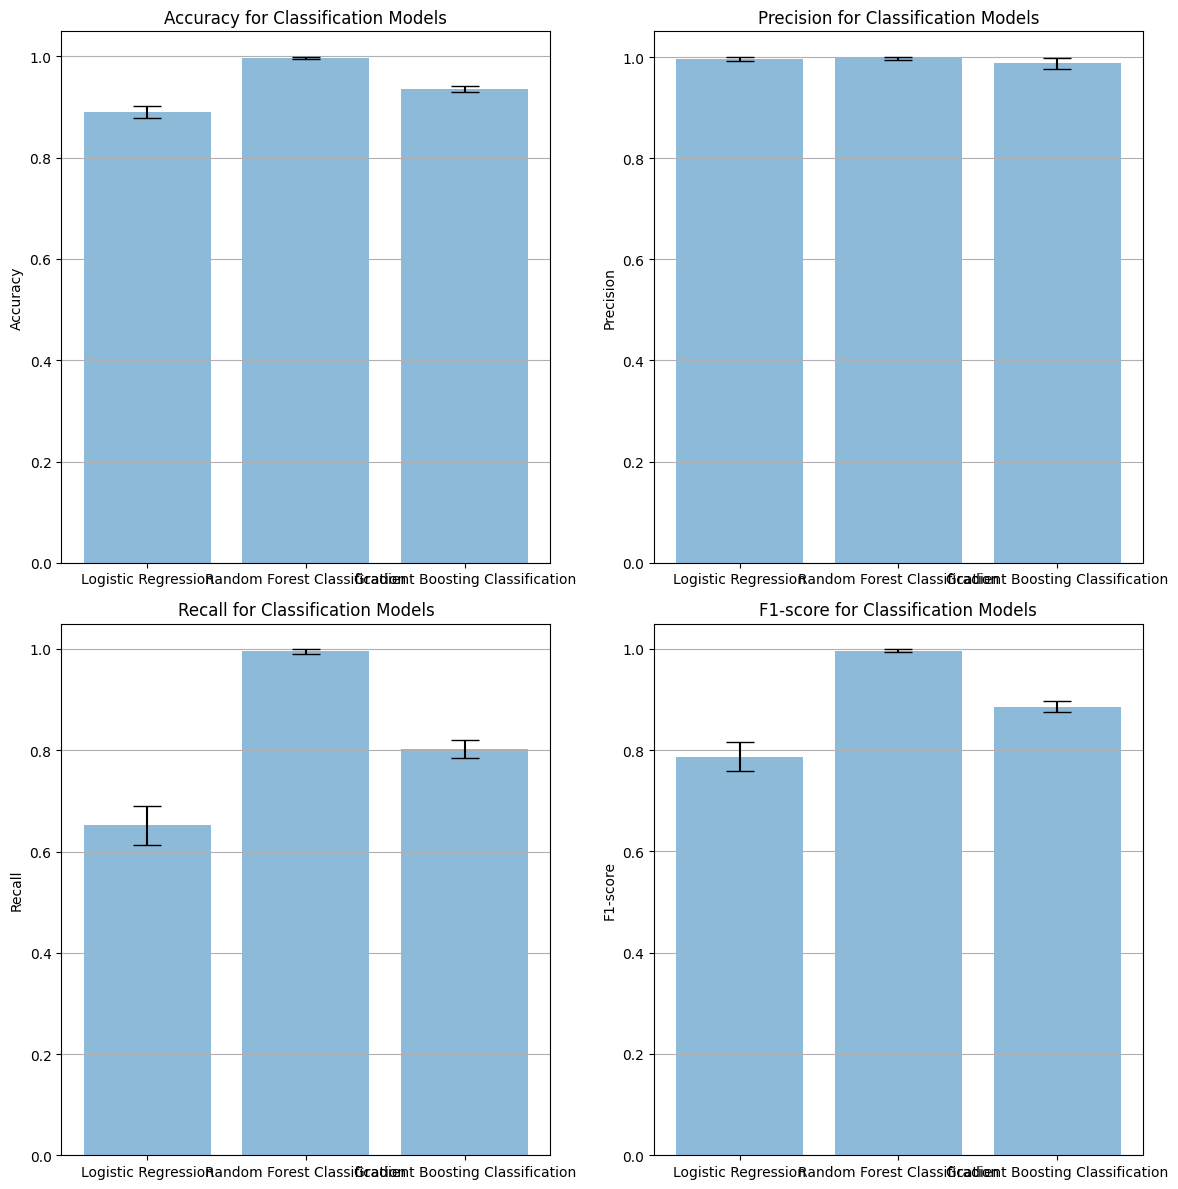

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Загружаем набор данных
df = pd.read_csv("data/Medical_insurance.csv")

# Определяем категориальные и числовые столбцы
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Создаем преобразователь для категориальных и числовых столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи регрессии
X_reg = df[categorical_cols + numerical_cols]
y_reg = df['charges']

# Список моделей для задачи регрессии
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Оценка смещения и дисперсии для задачи регрессии
mae_means = []
mae_stds = []
r2_means = []
r2_stds = []

for name, model in models_reg.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    mae_scores = -cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(pipeline, X_reg, y_reg, cv=5, scoring='r2')
    mae_means.append(mae_scores.mean())
    mae_stds.append(mae_scores.std())
    r2_means.append(r2_scores.mean())
    r2_stds.append(r2_scores.std())

# Визуализация результатов для задачи регрессии
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(models_reg.keys(), mae_means, yerr=mae_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0].set_ylabel('MAE')
ax[0].set_title('Mean Absolute Error (MAE) for Regression Models')
ax[0].yaxis.grid(True)

ax[1].bar(models_reg.keys(), r2_means, yerr=r2_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1].set_ylabel('R²')
ax[1].set_title('R-squared (R²) for Regression Models')
ax[1].yaxis.grid(True)

plt.tight_layout()
plt.show()

# Разделяем данные на признаки (X) и целевую переменную (y) для задачи классификации
X_class = df[categorical_cols + numerical_cols]
y_class = (df['charges'] > df['charges'].mean()).astype(int)

# Список моделей для задачи классификации
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classification": RandomForestClassifier(),
    "Gradient Boosting Classification": GradientBoostingClassifier()
}

# Оценка смещения и дисперсии для задачи классификации
accuracy_means = []
accuracy_stds = []
precision_means = []
precision_stds = []
recall_means = []
recall_stds = []
f1_means = []
f1_stds = []

for name, model in models_class.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    accuracy_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='precision')
    recall_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='recall')
    f1_scores = cross_val_score(pipeline, X_class, y_class, cv=5, scoring='f1')
    accuracy_means.append(accuracy_scores.mean())
    accuracy_stds.append(accuracy_scores.std())
    precision_means.append(precision_scores.mean())
    precision_stds.append(precision_scores.std())
    recall_means.append(recall_scores.mean())
    recall_stds.append(recall_scores.std())
    f1_means.append(f1_scores.mean())
    f1_stds.append(f1_scores.std())

# Визуализация результатов для задачи классификации
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].bar(models_class.keys(), accuracy_means, yerr=accuracy_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].set_title('Accuracy for Classification Models')
ax[0, 0].yaxis.grid(True)

ax[0, 1].bar(models_class.keys(), precision_means, yerr=precision_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[0, 1].set_ylabel('Precision')
ax[0, 1].set_title('Precision for Classification Models')
ax[0, 1].yaxis.grid(True)

ax[1, 0].bar(models_class.keys(), recall_means, yerr=recall_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1, 0].set_ylabel('Recall')
ax[1, 0].set_title('Recall for Classification Models')
ax[1, 0].yaxis.grid(True)

ax[1, 1].bar(models_class.keys(), f1_means, yerr=f1_stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax[1, 1].set_ylabel('F1-score')
ax[1, 1].set_title('F1-score for Classification Models')
ax[1, 1].yaxis.grid(True)

plt.tight_layout()
plt.show()